1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

Z = 3.4661629670697414
cdf of x0=15: 0.0008444930803583883
Is this number signficantly different? YES


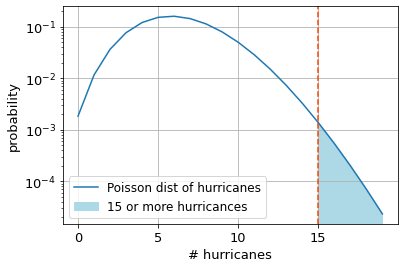

In [1]:
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

x0 = 15
mu = 6.3
mean, var = stats.poisson.stats(mu, moments='mv')

# determine the Z score
Z = abs(x0 - mu) / sqrt(var)
print("Z =", Z)

cdf_x0 = 1 - stats.poisson.cdf(15, mu)
print('cdf of x0=15:', cdf_x0)
print('Is this number signficantly different?', 'YES')

x = np.arange(stats.poisson.ppf(0.00001, mu),  stats.poisson.ppf(0.99999, mu))
y = stats.poisson.pmf(x, mu)
plt.plot(x, y, label='Poisson dist of hurricanes')
plt.yscale('log')
plt.fill_between(x, y, where=x >= x0, color='lightblue', label='15 or more hurricances')
plt.axvline(x=x0, color='orangered', linestyle='--')
plt.grid()
plt.tick_params(labelsize=13)
plt.xlabel('# hurricanes', fontsize=13)
plt.ylabel('probability', fontsize=13)
plt.legend(fontsize=12)
plt.show()

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

<font color='blue'>We will consider the following null hypothesis:
*the mean difference between the pre and post blood pressure scores is equal to 0*<font color='blue'>

T = -3.786997938137629


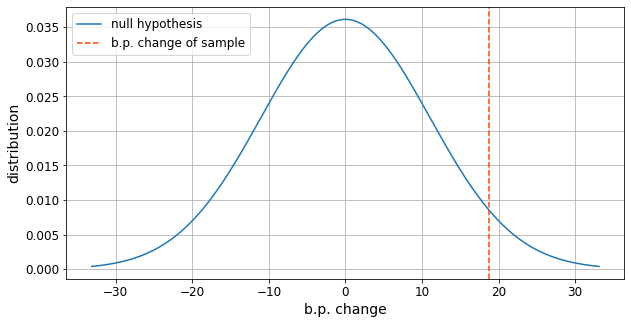

p-value = 0.004302464132864604


In [2]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
sigma_pre = np.sqrt(np.var(pre, ddof=1))
sigma_post = np.sqrt(np.var(post, ddof=1))
sigma = np.sqrt((sigma_pre ** 2 + sigma_post ** 2) / 2)

n = len(pre)
# calculate the test statistics
T = (np.mean(pre) - np.mean(post)) / (sigma * np.sqrt(2 / n))
print("T =", T)

mu_pre = np.mean(pre)
mu_post = np.mean(post)

x = np.linspace(- 3 * sigma, 3 * sigma, 1000)
y = stats.norm.pdf(x, loc=0, scale=sigma)
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='null hypothesis')
plt.axvline(x=mu_post - mu_pre, color='orangered', linestyle='--', label='b.p. change of sample')
plt.grid()
plt.xlabel('b.p. change', fontsize=14)
plt.ylabel('distribution', fontsize=14)
plt.tick_params(labelsize=12)
plt.legend(fontsize=12)
plt.show()

# now we calculate the p-value. Since it's double sided:
pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)

<font color='blue'>p-value is small enough to reject the null hypothesis, so the sample is statistically significant<font color='blue'>

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

hares period = 10.5 years
lynxes period = 10.5 years


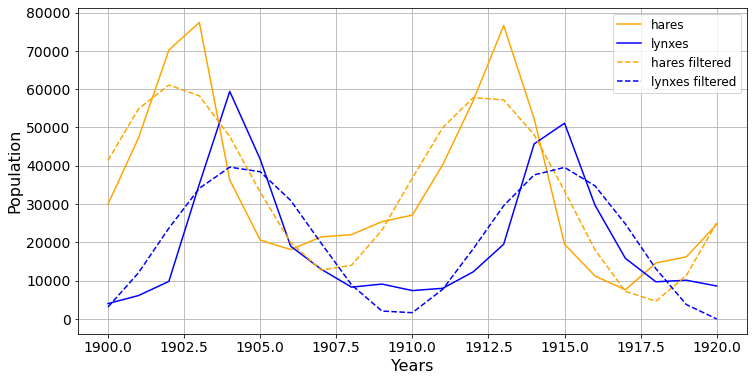

In [3]:
from scipy import fftpack

data = np.loadtxt("populations.txt")
years, hares, lynxes, carrots = data[:, 0], data[:, 1], data[:, 2], data[:, 3]
plt.figure(figsize=(12,6))
plt.plot(years, hares, 'orange', label=f'hares')
plt.plot(years, lynxes, 'b', label=f'lynxes')


def filter_signal(sig):
    time_step = 1
    # The FFT of the signal
    sig_fft = fftpack.fft(sig)
    # And the power (sig_fft is of complex dtype)
    power = np.abs(sig_fft) # these are the "weights" of the Fourier components for each discrete frequency interval
    # The return the corresponding frequencies
    sample_freq = fftpack.fftfreq(sig.size, d=time_step)
    # Find the peak frequency: focus only on only the positive frequencies
    pos_mask = np.where(sample_freq > 0)
    freqs = sample_freq[pos_mask]
    powes = power[pos_mask]
    # find the max of freqs array
    peak_freq = freqs[powes.argmax()]
    # compute the period
    period = 1 / peak_freq

    high_freq_fft = sig_fft.copy()
    # filter (set to zero) all high frequency components that are larger than peak_freq
    high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
    # calculate the Inverse Fast Fourier Transform
    filtered_sig = fftpack.ifft(high_freq_fft)
    # only take the real part
    real_filtered_signal = np.real(filtered_sig)
    return real_filtered_signal, period


hares_filtered, hares_period = filter_signal(hares)
lynxes_filtered, lynxed_period = filter_signal(lynxes)

plt.plot(years, hares_filtered, '--', color='orange', label=f'hares filtered')
plt.plot(years, lynxes_filtered, 'b--', label=f'lynxes filtered')


plt.xlabel('Years', fontsize=16)
plt.ylabel('Population', fontsize=16)
plt.tick_params(labelsize=14)
plt.grid()
plt.legend(fontsize=12)

print('hares period =', round(hares_period, 2), 'years')
print('lynxes period =', round(lynxed_period, 2), 'years')

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

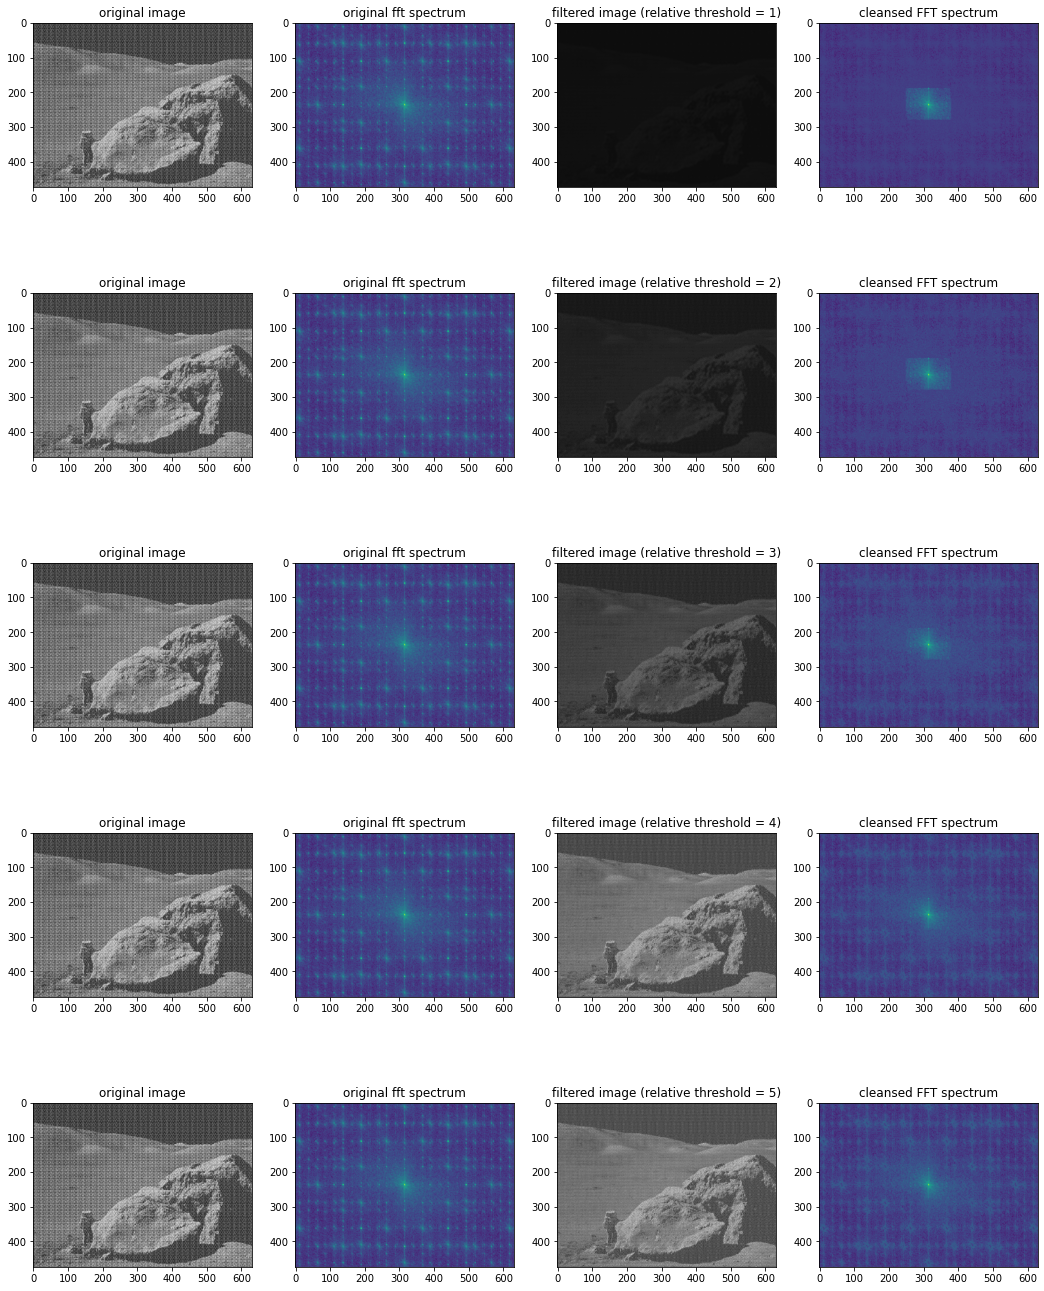

In [4]:
from matplotlib.colors import LogNorm
from scipy import fftpack

# figure initialization
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(18, 24))

image = plt.imread("moonlanding.png").astype(float)
img_fft = fftpack.fftshift(fftpack.fft2(image))
powers = np.abs(img_fft)

# central region of the FFT spectrum is the actual signal, so we keep the central region and remove the small peaks around it
mask_noise = np.ones(img_fft.shape)
mask_noise[190:280, 250:380] = 0
mask = np.zeros(img_fft.shape)
mask[190:280, 250:380] = 1


for i in range(len(ax)):
    ax[i][0].imshow(image, cmap='gray')
    ax[i][0].set_title('original image')
    ax[i][1].imshow(powers, norm=LogNorm(vmin=5))
    ax[i][1].set_title('original fft spectrum')

    # we define a relative threshold above which noise is eliminated - the power value is diminished to median value of powers
    relative_threshold = i + 1
    
    # noise filtering
    noise_fft = img_fft.copy()
    noise_fft = noise_fft * mask_noise
    median_signal = np.median(powers)
    noise_fft[np.abs(noise_fft) > relative_threshold * median_signal] = median_signal 
    
    # creating the cleansed spectrum
    cleansed_img_fft = img_fft.copy()
    cleansed_img_fft = cleansed_img_fft * mask + noise_fft
    ax[i][3].imshow(np.abs(cleansed_img_fft), norm=LogNorm(vmin=5))
    ax[i][3].set_title('cleansed FFT spectrum')
    
    # inverting the FFT to get the filtered image
    filtered_image = fftpack.ifft2(fftpack.ifftshift(cleansed_img_fft)).real
    ax[i][2].imshow(filtered_image, norm=None, cmap='gray')
    ax[i][2].set_title(f'filtered image (relative threshold = {relative_threshold})')
    
    

plt.show()